In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from pandas.tools.plotting import scatter_matrix
import cPickle as pickle

In [12]:
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)

In [8]:
df = pd.read_pickle('df_95_features.pkl')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6005 entries, 0 to 10999
Data columns (total 30 columns):
INITDT_dt                 6005 non-null datetime64[ns]
FLDSTARTDT_dt             6005 non-null datetime64[ns]
FLDENDDT_dt               6005 non-null datetime64[ns]
DURATION                  6005 non-null timedelta64[ns]
DURATION_td               6005 non-null float64
latitude                  6005 non-null float64
longitude                 6005 non-null float64
INIT_Quarter              6005 non-null int64
months_end_FY             6005 non-null int64
INIT_month                6005 non-null int64
neighborhood_label        6005 non-null category
Median_Home_Value         6005 non-null float64
Home_Margin_of_Error      6005 non-null float64
Median_Income             6005 non-null float64
Income_Margin_of_Error    6005 non-null float64
Number_potholes_x         6005 non-null int64
SND_FEACOD                6005 non-null category
ST_CODE                   6005 non-null category
SEGM

In [10]:
df[df.neighborhood_label == ''].shape

(0, 30)

In [11]:
df.isnull().values.any()

False

In [22]:
core_features = ['months_end_FY', 'cumul_potholes', 'Temp', 'Number_potholes_y', 
                 'Median_Home_Value', 'Median_Income', 'min_dist', 'INIT_month']
colors = ['red' if ix else 'blue' for ix in df.b_long_repair]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018633400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C250198>]], dtype=object)

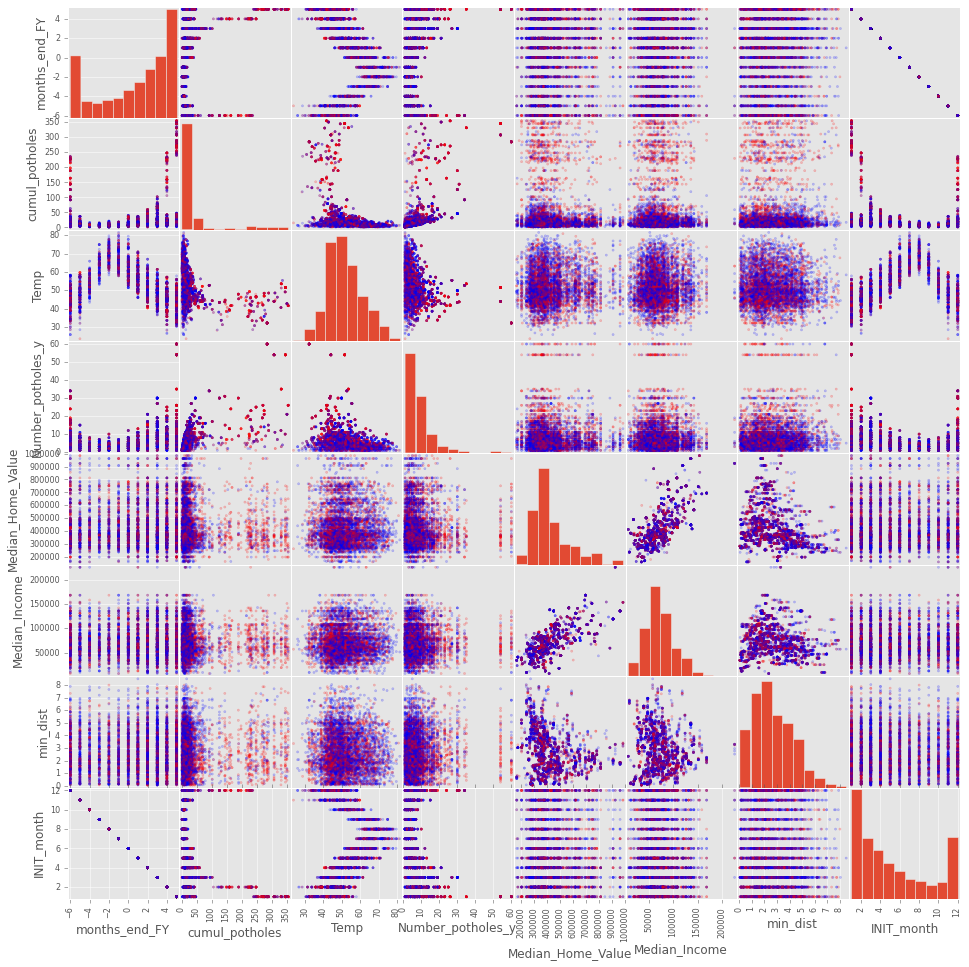

In [23]:
scatter_matrix(df[core_features], alpha=0.2, figsize=(16, 16), diagonal='hist', color=colors)

In [87]:
df[core_features].corr()

,months_end_FY,cumul_potholes,Temp,Number_potholes_y,Median_Home_Value,Median_Income,min_dist,INIT_month
months_end_FY,1.000000,0.255397,-0.265128,0.239431,-0.023682,-0.026753,0.013294,-1.000000
cumul_potholes,0.255397,1.000000,-0.367274,0.654326,-0.033906,-0.008501,0.055850,-0.255397
Temp,-0.265128,-0.367274,1.000000,-0.314737,0.024058,0.008901,-0.033835,0.265128
Number_potholes_y,0.239431,0.654326,-0.314737,1.000000,-0.012937,-0.010344,0.033879,-0.239431
Median_Home_Value,-0.023682,-0.033906,0.024058,-0.012937,1.000000,0.697979,-0.274016,0.023682
Median_Income,-0.026753,-0.008501,0.008901,-0.010344,0.697979,1.000000,-0.051793,0.026753
min_dist,0.013294,0.055850,-0.033835,0.033879,-0.274016,-0.051793,1.000000,-0.013294
INIT_month,-1.000000,-0.255397,0.265128,-0.239431,0.023682,0.026753,-0.013294,1.000000


In [43]:
X = df[['cumul_potholes','Median_Home_Value','Temp','min_dist','months_end_FY']]
y = df['long_repair']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [45]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [46]:
lr.score(X_test,y_test)

0.64446294754371358

In [47]:
skm.roc_auc_score(y_test, lr.predict(X_test))

0.58220247758876265

In [48]:
confusion_matrix(y_test, lr.predict(X_test))

array([[627, 117],
       [310, 147]])

In [24]:
df_dum_neighborhood_label = pd.get_dummies(df.neighborhood_label)
df_dum_SND_FEACOD = pd.get_dummies(df.SND_FEACOD)
df_dum_ST_CODE = pd.get_dummies(df.ST_CODE)
df_dum_SEGMENT_TY = pd.get_dummies(df.SEGMENT_TY)
df_dum_DIVIDED_CO = pd.get_dummies(df.DIVIDED_CO)
df_dum_VEHICLE_US = pd.get_dummies(df.VEHICLE_US)

In [49]:
df_data = pd.concat([df.ix[:, ['cumul_potholes','Median_Home_Value','Temp', 'months_end_FY','min_dist']],
        df_dum_neighborhood_label, df_dum_SND_FEACOD, df_dum_ST_CODE, df_dum_SEGMENT_TY, df_dum_DIVIDED_CO,
        df_dum_VEHICLE_US], axis=1)

In [50]:
X=df_data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [52]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1) #Wouldn't take the class_weight = 'auto' option)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
rfc.score(X_test, y_test)

0.65695253955037469

In [54]:
skm.roc_auc_score(y_test, rfc.predict(X_test))

0.61676195854215188

In [55]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[584, 160],
       [252, 205]])

In [58]:
len(y_test), len(rfc.predict(X_test))

(1201, 1201)

In [59]:
y_test.value_counts()

0    744
1    457
dtype: int64

In [60]:
y_predict = rfc.predict(X_test)

In [82]:
df_corr = df.ix[X_test[y_predict == y_test].index.tolist(),['latitude','longitude']]
df_not_corr = df.ix[X_test[y_predict != y_test].index.tolist(),['latitude','longitude']]

In [83]:
df_corr.shape, df_not_corr.shape

((789, 2), (412, 2))

In [85]:
df_corr.to_pickle('df_corr.pkl')
df_not_corr.to_pickle('df_not_corr.pkl')

####No visually discernable pattern to the right and wrong predictions

####I need to run statsmodels logistic regression to get the diagnostics on the numerical variables.  There was a repo.